## Final Project Submission

Please fill out:
* Student name: Muloma Olive Mideva
* Student pace: Full Time
* Scheduled project review date/time: June 7th
* Instructor name: Maryann Mwikali

## Imports

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

The cells below contain code on reading, analyzing and cleaning my dataset

### 1. Reading the Dataset

In [6]:
df = pd.read_csv('Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv', index_col=0)
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


#### Dataset Description

The dataset contains information on employees, focusing on factors that might influence their decision to leave the company (attrition). Here are the columns and their descriptions:

1. **Attrition**: Indicates whether an employee has left the company.
    - Example Values: `Yes`, `No`

2. **BusinessTravel**: Frequency of travel for business purposes.
    - Example Values: `Travel_Rarely`, `Travel_Frequently`

3. **DailyRate**: Daily salary rate of the employee.
    - Example Values: `1102`, `279`

4. **Department**: Department in which the employee works.
    - Example Values: `Sales`, `Research & Development`

5. **DistanceFromHome**: Distance from the employee's residence to the workplace.
    - Example Values: `1`, `8`

6. **Education**: Education level of the employee (numerical values representing different education levels).
    - Example Values: `2`, `1`

7. **EducationField**: Field of study of the employee.
    - Example Values: `Life Sciences`, `Medical`

8. **EmployeeCount**: Total number of employees (usually a placeholder with a value of 1 for each record).
    - Example Value: `1`

9. **EmployeeNumber**: Unique identifier for each employee.
    - Example Values: `1`, `2`

10. **EnvironmentSatisfaction**: Employee's satisfaction with the work environment (scale 1-4).
    - Example Values: `2`, `4`

11. **RelationshipSatisfaction**: Satisfaction with relationships at work (scale 1-4).
    - Example Values: `1`, `4`

12. **StandardHours**: Standard working hours (usually fixed, e.g., 80 hours bi-weekly).
    - Example Value: `80`

13. **StockOptionLevel**: Employee's stock option level (scale 0-3).
    - Example Values: `0`, `1`

14. **TotalWorkingYears**: Total number of years the employee has worked in their career.
    - Example Values: `8`, `10`

15. **TrainingTimesLastYear**: Number of training sessions attended by the employee last year.
    - Example Values: `0`, `3`

16. **WorkLifeBalance**: Employee's work-life balance rating (scale 1-4).
    - Example Values: `1`, `3`

17. **YearsAtCompany**: Number of years the employee has been with the company.
    - Example Values: `6`, `10`

18. **YearsInCurrentRole**: Number of years the employee has been in their current role.
    - Example Values: `4`, `7`

19. **YearsSinceLastPromotion**: Number of years since the employee's last promotion.
    - Example Values: `0`, `1`

20. **YearsWithCurrManager**: Number of years the employee has worked with their current manager.
    - Example Values: `5`, `7`

#### Usage

This dataset is typically used to build models to predict employee attrition based on various features. By understanding which factors contribute most to attrition, companies can implement targeted strategies to improve employee retention. The dataset contains a mix of numerical and categorical data, which is suitable for machine learning algorithms like Decision Trees and Random Forests.

In [7]:
df.shape

(1470, 34)

The dataset contains 1470 rows and 34 columns according to the output above

In [8]:
df.info

<bound method DataFrame.info of     Attrition     BusinessTravel  DailyRate              Department  \
Age                                                                   
41        Yes      Travel_Rarely       1102                   Sales   
49         No  Travel_Frequently        279  Research & Development   
37        Yes      Travel_Rarely       1373  Research & Development   
33         No  Travel_Frequently       1392  Research & Development   
27         No      Travel_Rarely        591  Research & Development   
..        ...                ...        ...                     ...   
36         No  Travel_Frequently        884  Research & Development   
39         No      Travel_Rarely        613  Research & Development   
27         No      Travel_Rarely        155  Research & Development   
49         No  Travel_Frequently       1023                   Sales   
34         No      Travel_Rarely        628  Research & Development   

     DistanceFromHome  Education EducationFi

From the above output above we get that:

- Total entries: 1470
- Total columns: 35
- Non-null entries for each column: 1470
- Data types: Mix of integers, floats, and objects (categorical data)
- Memory usage: Approximately 402.4+ KB

### 2. Cleaning the Dataset

1. **Check for null values**

In [9]:
df.isna().sum()

Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

According to the above my dataset has no null values

 2. **Check for duplicates**

In [10]:
duplicates_with_rows = df[df.duplicated()]
duplicates_with_rows

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,


The dataset also has no duplicates. This dataset therefore needs no cleaning.

### 3. Descriptive Analysis

In [11]:
df.describe()

,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## EDA(Exploratory Data Analysis)

In this section there is a deep dive into the dataset using visualizations. It helps in feature importance, class distribution, and relationships between features and the target variable.

### 1. Class Imbalance

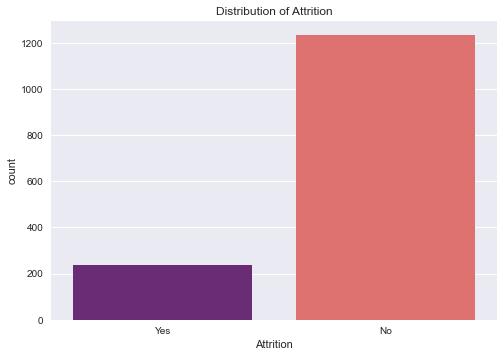

In [13]:
sns.countplot(data=df, x='Attrition', palette="magma")
plt.title('Distribution of Attrition')
plt.show()

### 2. Checking for outliers

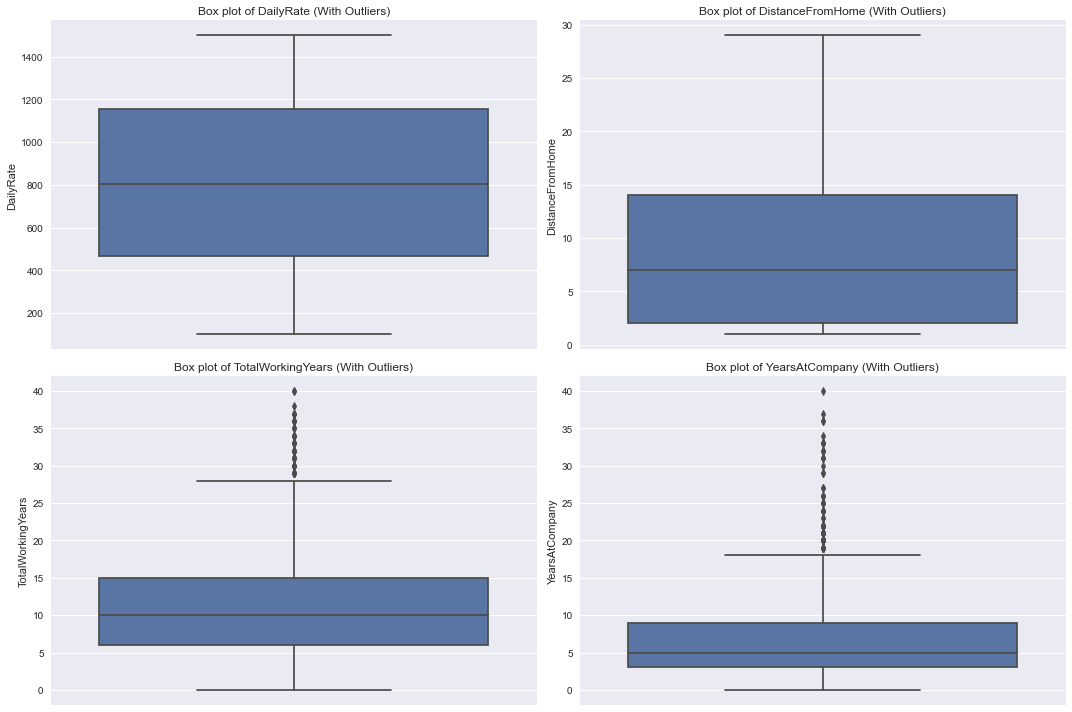

In [22]:
def plot_boxplots_with_outliers(df, numerical_columns):
    """
    Plot box plots for numerical features with outliers.

    Args:
    - df: DataFrame containing the data
    - numerical_columns: List of numerical column names

    Returns:
    - None
    """
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(data=df, y=col)
        plt.title(f'Box plot of {col} (With Outliers)')
    plt.tight_layout()
    plt.show()

# List of numerical features to check for outliers    
numerical_columns = ['DailyRate', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']

# Call the function to plot box plots with outliers
plot_boxplots_with_outliers(df, numerical_columns)


My dataset has outliers but I am not removing them because it might affect my accuracy because they are important values needed for the dataset. Removing values from the columns 'TotalWorkingYears' and 'YearsAtCompany' will lead to loss of valuable information.